# TO EXPLORE SUPERVISED MACHINE LEARNING

# LINEAR REGRESSION
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Importing required libraries 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sb

# Loading and reading the dataset

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# BASIC CHECKS

In [3]:
df.shape

(25, 2)

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
#variable identification
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df['Hours'].isnull().sum()

0

In [9]:
df['Scores'].isnull().sum()

0

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

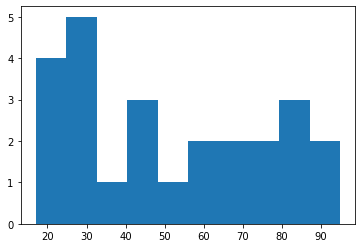

In [10]:
#exploratory data analysis
#Histogram on Scores column

plt.hist(df.Scores)

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <a list of 10 Patch objects>)

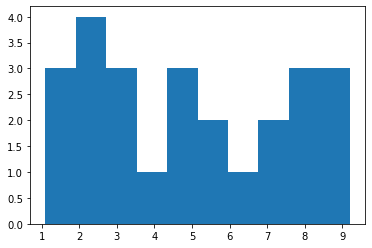

In [11]:
#histogram on Hours column
plt.hist(df.Hours)

Text(0, 0.5, 'SCORES')

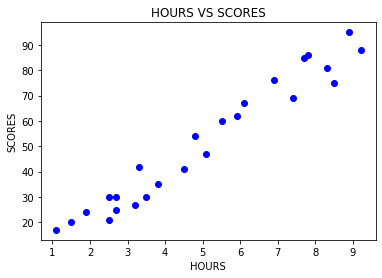

In [12]:
#bivariate analysis (plot between Hours and Scores)
plt.plot(df.Hours,df.Scores,"bo");
plt.title('HOURS VS SCORES')
plt.xlabel('HOURS')
plt.ylabel('SCORES')

# Data preparation
defining X and y

In [13]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
X
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Training and Testing
now we randomly split our data into training and testing data using the function train_test_split

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)


lets import LinearRegression from the module Linear_model & create LinearRegression object & fit the model

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()      #here model name is regressor
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# VISUALIZATION

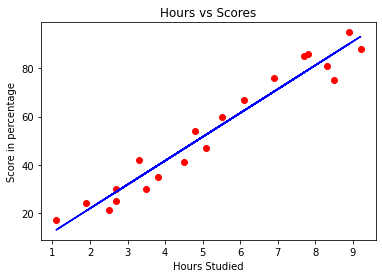

In [16]:
# Plotting the regression line
plt.scatter(X_train ,y_train,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score in percentage')
plt.show()

In [17]:
#printing the values of y intercept and slope
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434683
[9.91065648]


# Making predictions

In [18]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test)# Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# PREDICTING THE SCORE WHEN A STUDENT STUDIES FOR 9.25 HOURS

In [20]:
print("The Predicted score :",regressor.predict([[9.25]])[0])

The Predicted score : 93.69173248737538


# Evaluating the model

In [21]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))    

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


# Accuracy of the model

In [22]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('R square:',r2_score(y_test,y_pred))

R square: 0.9454906892105356


THANK YOU